# Amazon Bestsellers: 2009-2019
\
Amazon started as an online marketplace for books in 1994, and while it has grown exponentially over the years, books are still one of its most popular products.

In this project, we'll examine a dataset of Amazon's Top 50 bestselling books from 2009-2019. This dataset contains 550 books and was downloaded from Kaggle.
\
\
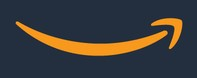

## Importing Modules and CSV

We'll start by importing the modules we'll need to examine our dataset and then importing the csv file as a dataframe.

In [1]:
#import necessary modules

import pandas as pd
import matplotlib.pyplot as plt

#import csv using Pandas

filename = 'bestsellers with categories.csv'
df = pd.read_csv(filename)

## Exploring the Dataframe

First, let's explore the content using some basic functions.

In [2]:
#display first five rows to preview the data

df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
#display name of columns and data types

df.info()

#Display summary statistics

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
Name           550 non-null object
Author         550 non-null object
User Rating    550 non-null float64
Reviews        550 non-null int64
Price          550 non-null int64
Year           550 non-null int64
Genre          550 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


## Data Analysis

### The Authors

Let's start by reviewing the authors and answering these questions.

* How many unique authors are on the list?
* Which authors show up on the list the most?
* Which authors have the best ratings?

In [4]:
df_unique = df.nunique()
print(df_unique)

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64


There are 248 authors in the list and 351 books so we know that some authors show up on the list multiple times. Let's create a frequency table showing how many times each author shows up on the Amazon bestseller list.

In [24]:
#create frequency table

freq_author = df.groupby(['Author']).size().reset_index(name='Count')
print(freq_author)

                         Author  Count
0              Abraham Verghese      2
1                Adam Gasiewski      1
2                 Adam Mansbach      1
3                     Adir Levy      1
4    Admiral William H. McRaven      1
..                          ...    ...
243             Walter Isaacson      3
244               William Davis      2
245            William P. Young      2
246            Wizards RPG Team      3
247                Zhi Gang Sha      2

[248 rows x 2 columns]


Let's sort the table so we can see which authors have the most titles on the list.

In [6]:
#sort frequency table

freq_author_sorted = freq_author.sort_values(['Count'],ascending=False)
print(freq_author_sorted)

                                 Author  Count
120                         Jeff Kinney     12
92                         Gary Chapman     11
226                     Suzanne Collins     11
197                        Rick Riordan     11
11   American Psychological Association     10
..                                  ...    ...
61                          David Grann      1
143                    Larry Schweikart      1
62                     David McCullough      1
141                     Khaled Hosseini      1
171                      Muriel Barbery      1

[248 rows x 2 columns]


Let's view the Top 10 authors by printing the first 10 rows of our sorted frequency table.

In [29]:
#view first 10 rows

top_10 = freq_author_sorted.head(10)
print(top_10)

                                 Author  Count
120                         Jeff Kinney     12
92                         Gary Chapman     11
226                     Suzanne Collins     11
197                        Rick Riordan     11
11   American Psychological Association     10
90                               Gallup      9
73                            Dr. Seuss      9
199                         Rob Elliott      8
83                           Eric Carle      7
27                        Bill O'Reilly      7


We can see that Jeff Kinney shows up on the list the most often with 12 titles.

We can also view this information in a bar chart.

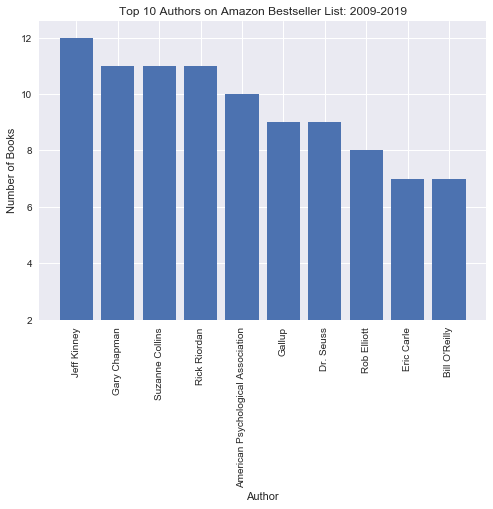

In [31]:
#create bar chart

plt.style.use('seaborn')
fig,ax = plt.subplots()
ax.bar(top_10['Author'],top_10['Count'])
ax.set_xticklabels(top_10['Author'], rotation=90)
ax.set_xlabel('Author')
ax.set_ylabel('Number of Books')
ax.set_ylim([2,None])
ax.set_title('Top 10 Authors on Amazon Bestseller List: 2009-2019')
plt.show()

Now we want to see which authors have the best ratings.

In [38]:
avg_ratings = df.groupby('Author').agg({'User Rating':'mean'}).reset_index()
print(avg_ratings)

                         Author  User Rating
0              Abraham Verghese     4.600000
1                Adam Gasiewski     4.400000
2                 Adam Mansbach     4.800000
3                     Adir Levy     4.800000
4    Admiral William H. McRaven     4.700000
..                          ...          ...
243             Walter Isaacson     4.566667
244               William Davis     4.400000
245            William P. Young     4.600000
246            Wizards RPG Team     4.800000
247                Zhi Gang Sha     4.600000

[248 rows x 2 columns]


Again, let's sort this data and view the Top 10 authors by rating.

In [28]:
#sort table

sorted_ratings = avg_ratings.sort_values('User Rating',ascending=False)
print(sorted_ratings)

              Author  User Rating
123       Jill Twiss          4.9
173   Nathan W. Pyle          4.9
41       Chip Gaines          4.9
206    Rush Limbaugh          4.9
26   Bill Martin Jr.          4.9
..               ...          ...
180    Paula Hawkins          4.1
171   Muriel Barbery          4.0
100    Gillian Flynn          4.0
90            Gallup          4.0
71       Donna Tartt          3.9

[248 rows x 2 columns]


In [30]:
#view first 10 rows

top_10_sorted_ratings = sorted_ratings.head(10)
print(top_10_sorted_ratings)

                    Author  User Rating
123             Jill Twiss          4.9
173         Nathan W. Pyle          4.9
41             Chip Gaines          4.9
206          Rush Limbaugh          4.9
26         Bill Martin Jr.          4.9
82   Emily Winfield Martin          4.9
183             Pete Souza          4.9
178         Patrick Thorpe          4.9
146     Lin-Manuel Miranda          4.9
215   Sherri Duskey Rinker          4.9


We can see that the Top 10 all have ratings of 4.9.

### The Genres

Our dataset categorizes books into two genres: Fiction and Non Fiction. Here, we want to answer a few questions:

* Which genre appears on the list most often?
* How does genre compare regarding price and user rating?

We can start by creating a frequency table.

In [32]:
#create frequency table

genre_frequency = df.groupby(['Genre']).size().reset_index(name='Count')
print(genre_frequency)

         Genre  Count
0      Fiction    240
1  Non Fiction    310


We can see that Non Fiction books account for the majority of the titles on the Amazon Bestseller list.

Now let's create a new column showing this comparison as a percentage. We'll round the new Percentage column with two decimal places.

In [33]:
#add Percentage column

genre_frequency['Percentage'] = (genre_frequency['Count']/(240+310) * 100).round(2)
print(genre_frequency)

         Genre  Count  Percentage
0      Fiction    240       43.64
1  Non Fiction    310       56.36


Let's look at some more statistics based on genre.

In [14]:
#averages

df.groupby(['Genre'])[['User Rating','Price']].mean().round(2)

,User Rating,Price
Genre,,
Fiction,4.65,10.85
Non Fiction,4.60,14.84


In [15]:
#minimum and maximum

df.groupby(['Genre'])[['User Rating','Price']].agg([min,max])

User Rating      Price     
                    min  max   min  max
Genre                                  
Fiction             3.3  4.9     0   82
Non Fiction         4.0  4.9     0  105

The average User Rating for Fiction and Non Fiction is very similar, and it looks like Fiction books are cheaper on average.

Looking at the minimum Price, we can see that some books are available for free, which is common on Amazon. However, the maximum prices seem unusually high. Let's pull these rows to look at them more closely.

In [37]:
max_fiction = df[df['Price'] == 82]
print(max_fiction)

                             Name           Author  User Rating  Reviews  \
473  The Twilight Saga Collection  Stephenie Meyer          4.7     3801   

     Price  Year    Genre  
473     82  2009  Fiction  


The most expensive Fiction book is actually a collection of books in the Twilight Saga, so this price makes sense.

In [36]:
max_nonfiction = df[df['Price'] == 105]
print(max_nonfiction)

                                                 Name  \
69  Diagnostic and Statistical Manual of Mental Di...   
70  Diagnostic and Statistical Manual of Mental Di...   

                              Author  User Rating  Reviews  Price  Year  \
69  American Psychiatric Association          4.5     6679    105  2013   
70  American Psychiatric Association          4.5     6679    105  2014   

          Genre  
69  Non Fiction  
70  Non Fiction  


Here we see the most expensive Non Fiction books are manuals used by clinicians, so these prices make sense as well.

### The Prices

We saw earlier that prices in our dataset range from $0-105, which is quite a large range. Let's look a bit more closely at the data and answer these questions:

* How many books are free?
* How many books are over $50?
* What is the distribution of prices?

To answer the first question, we can subset our dataframe and pull only those rows where Price is equal to $0. This shows us that 12 books on the list were available for free.

In [18]:
free_books = len(df[df['Price'] == 0])
print(free_books)

12


Now let's pull the data for the most expensive books: those priced at or over $50.

In [19]:
exp_books = df[df['Price'] >= 50]
print(exp_books)

                                                  Name  \
69   Diagnostic and Statistical Manual of Mental Di...   
70   Diagnostic and Statistical Manual of Mental Di...   
151                           Hamilton: The Revolution   
159         Harry Potter Paperback Box Set (Books 1-7)   
346  The Book of Basketball: The NBA According to T...   
473                       The Twilight Saga Collection   

                               Author  User Rating  Reviews  Price  Year  \
69   American Psychiatric Association          4.5     6679    105  2013   
70   American Psychiatric Association          4.5     6679    105  2014   
151                Lin-Manuel Miranda          4.9     5867     54  2016   
159                     J. K. Rowling          4.8    13471     52  2016   
346                      Bill Simmons          4.7      858     53  2009   
473                   Stephenie Meyer          4.7     3801     82  2009   

           Genre  
69   Non Fiction  
70   Non Fiction  
151

In [20]:
print(len(exp_books))

6


We can see there are six books on the list with a price equal to or greater than $50. These all seem to be professional manuals, collections, or special publications.

To give us a look at the distribution of prices, let's create a histogram.

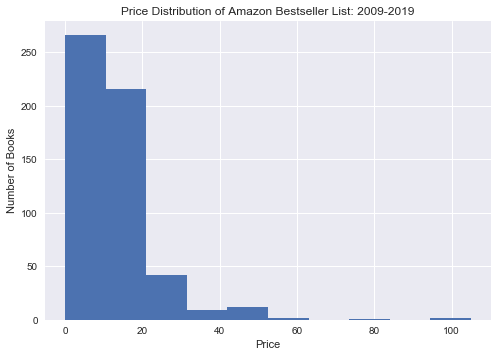

In [39]:
#create histogram

fig, ax = plt.subplots()
ax.hist(df['Price'])
ax.set_xlabel('Price')
ax.set_ylabel('Number of Books')
ax.set_title('Price Distribution of Amazon Bestseller List: 2009-2019')
plt.show()

We can see that the majority of books are under $10.

Let's separate the two genres and create a new histogram.

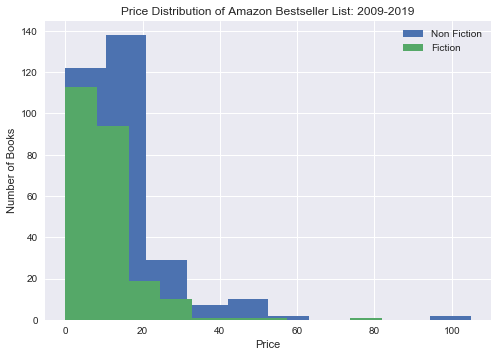

In [40]:
#create histogram

non_fiction = df[df['Genre'] == 'Non Fiction']
fiction = df[df['Genre'] == 'Fiction']

fig, ax = plt.subplots()
ax.hist(non_fiction['Price'], label = 'Non Fiction')
ax.hist(fiction['Price'], label = 'Fiction')
ax.set_xlabel('Price')
ax.set_ylabel('Number of Books')
ax.legend()
ax.set_title('Price Distribution of Amazon Bestseller List: 2009-2019')
plt.show()

## Conclusion

From analyzing our dataset, we have learned that multiple authors appeared on the Amazon Bestseller list more than once, and Jeff Kinney appears the most often with 12 entries. We also learned that Non Fiction was the more popular genre, with 56.36% of the entries. Lastly, we learned that the majority of books were priced at or below $10, and Non Fiction books skewed slightly more expensive.